In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
import torchinfo


from trainer import Trainer 
from tester import Tester
from utils import  visualize_data,show_misclassified_images,plot_class_distribution,plot_confusion_matrix,plot_curves
from dataloader import Cifar10DataLoader
from vistransformers import train_transforms,test_transforms
from model import Net,Network

In [3]:
torch.cuda.amp.autocast(enabled=True,dtype=torch.float16)
torch.set_float32_matmul_precision('medium')

In [4]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print("Is CUDA available? ", use_cuda)

Is CUDA available?  True


In [5]:
cifar10 = Cifar10DataLoader(is_cuda_available=use_cuda)

train_loader = cifar10.get_loader(transforms=train_transforms,train=True)
test_loader  = cifar10.get_loader(transforms=test_transforms,train=False) 

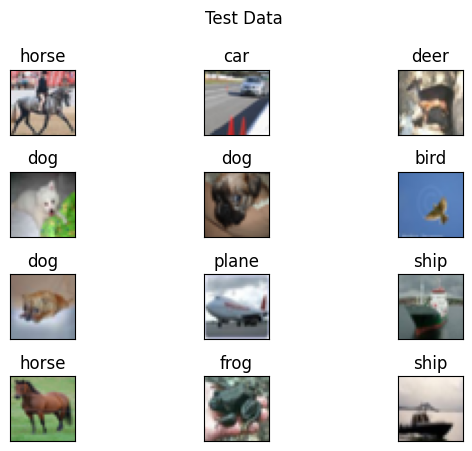

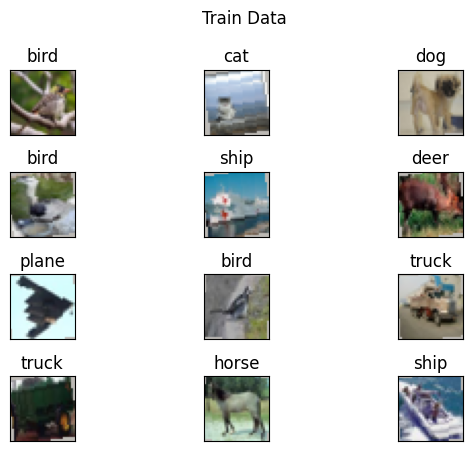

In [6]:
visualize_data(test_loader,12,"Test Data",classes=cifar10.classes)
visualize_data(train_loader,12,"Train Data",classes=cifar10.classes)

In [7]:
model = Network('layer')
torchinfo.summary(model=model.cuda(),input_data=torch.ones((1,3,32,32)),device="cuda")

Layer (type:depth-idx)                   Output Shape              Param #
Network                                  [1, 10]                   --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 16, 32, 32]           432
│    └─ReLU: 2-2                         [1, 16, 32, 32]           --
│    └─GroupNorm: 2-3                    [1, 16, 32, 32]           32
│    └─Dropout2d: 2-4                    [1, 16, 32, 32]           --
│    └─Conv2d: 2-5                       [1, 16, 32, 32]           2,304
│    └─ReLU: 2-6                         [1, 16, 32, 32]           --
│    └─GroupNorm: 2-7                    [1, 16, 32, 32]           32
│    └─Dropout2d: 2-8                    [1, 16, 32, 32]           --
│    └─Conv2d: 2-9                       [1, 10, 32, 32]           160
├─MaxPool2d: 1-2                         [1, 10, 16, 16]           --
├─Sequential: 1-3                        [1, 16, 16, 16]           --
│    └─Con

EPOCH=1| LR=0.200000| LOSS=1.80| BATCH=390| ACCURACY=27.690: 100%|██████████| 391/391 [00:11<00:00, 33.73it/s]
LOSS=139.91| BATCH=78| ACCURACY=35.550: 100%|██████████| 79/79 [00:00<00:00, 91.78it/s] 


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=2| LR=0.200000| LOSS=1.74| BATCH=390| ACCURACY=37.292: 100%|██████████| 391/391 [00:11<00:00, 33.89it/s]
LOSS=127.81| BATCH=78| ACCURACY=41.960: 100%|██████████| 79/79 [00:00<00:00, 91.45it/s] 


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=3| LR=0.200000| LOSS=1.56| BATCH=390| ACCURACY=41.776: 100%|██████████| 391/391 [00:11<00:00, 33.53it/s]
LOSS=116.73| BATCH=78| ACCURACY=45.620: 100%|██████████| 79/79 [00:00<00:00, 92.78it/s] 


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=4| LR=0.200000| LOSS=1.35| BATCH=390| ACCURACY=45.670: 100%|██████████| 391/391 [00:11<00:00, 33.99it/s]
LOSS=109.88| BATCH=78| ACCURACY=49.290: 100%|██████████| 79/79 [00:00<00:00, 91.45it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=5| LR=0.200000| LOSS=1.34| BATCH=390| ACCURACY=49.144: 100%|██████████| 391/391 [00:11<00:00, 33.73it/s]
LOSS=105.93| BATCH=78| ACCURACY=50.510: 100%|██████████| 79/79 [00:00<00:00, 89.60it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=6| LR=0.200000| LOSS=1.35| BATCH=390| ACCURACY=52.576: 100%|██████████| 391/391 [00:11<00:00, 33.67it/s]
LOSS=96.10| BATCH=78| ACCURACY=56.010: 100%|██████████| 79/79 [00:00<00:00, 90.27it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=7| LR=0.200000| LOSS=1.27| BATCH=390| ACCURACY=55.212: 100%|██████████| 391/391 [00:11<00:00, 34.63it/s]
LOSS=92.07| BATCH=78| ACCURACY=57.640: 100%|██████████| 79/79 [00:00<00:00, 90.39it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=8| LR=0.200000| LOSS=1.60| BATCH=390| ACCURACY=57.828: 100%|██████████| 391/391 [00:11<00:00, 35.29it/s]
LOSS=98.94| BATCH=78| ACCURACY=54.900: 100%|██████████| 79/79 [00:00<00:00, 100.91it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=9| LR=0.200000| LOSS=1.18| BATCH=390| ACCURACY=59.312: 100%|██████████| 391/391 [00:10<00:00, 35.66it/s]
LOSS=85.90| BATCH=78| ACCURACY=61.660: 100%|██████████| 79/79 [00:00<00:00, 100.04it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=10| LR=0.200000| LOSS=1.03| BATCH=390| ACCURACY=61.580: 100%|██████████| 391/391 [00:10<00:00, 36.10it/s]
LOSS=87.67| BATCH=78| ACCURACY=61.450: 100%|██████████| 79/79 [00:00<00:00, 99.90it/s] 


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=11| LR=0.200000| LOSS=0.81| BATCH=390| ACCURACY=62.256: 100%|██████████| 391/391 [00:10<00:00, 36.24it/s]
LOSS=79.66| BATCH=78| ACCURACY=65.230: 100%|██████████| 79/79 [00:00<00:00, 102.24it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=12| LR=0.200000| LOSS=1.13| BATCH=390| ACCURACY=63.546: 100%|██████████| 391/391 [00:10<00:00, 36.34it/s]
LOSS=78.94| BATCH=78| ACCURACY=65.180: 100%|██████████| 79/79 [00:00<00:00, 99.47it/s] 


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=13| LR=0.200000| LOSS=1.00| BATCH=390| ACCURACY=65.044: 100%|██████████| 391/391 [00:10<00:00, 36.59it/s]
LOSS=72.78| BATCH=78| ACCURACY=67.500: 100%|██████████| 79/79 [00:00<00:00, 99.81it/s] 


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=14| LR=0.200000| LOSS=0.97| BATCH=390| ACCURACY=66.126: 100%|██████████| 391/391 [00:10<00:00, 36.20it/s]
LOSS=72.33| BATCH=78| ACCURACY=68.270: 100%|██████████| 79/79 [00:00<00:00, 99.74it/s] 


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=15| LR=0.200000| LOSS=0.83| BATCH=390| ACCURACY=66.858: 100%|██████████| 391/391 [00:10<00:00, 35.61it/s]
LOSS=69.30| BATCH=78| ACCURACY=69.190: 100%|██████████| 79/79 [00:00<00:00, 90.26it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=16| LR=0.200000| LOSS=0.76| BATCH=390| ACCURACY=67.446: 100%|██████████| 391/391 [00:11<00:00, 34.84it/s]
LOSS=68.76| BATCH=78| ACCURACY=69.660: 100%|██████████| 79/79 [00:00<00:00, 98.59it/s] 


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=17| LR=0.200000| LOSS=0.98| BATCH=390| ACCURACY=68.590: 100%|██████████| 391/391 [00:11<00:00, 34.88it/s]
LOSS=68.61| BATCH=78| ACCURACY=70.260: 100%|██████████| 79/79 [00:00<00:00, 89.33it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=18| LR=0.200000| LOSS=0.86| BATCH=390| ACCURACY=68.834: 100%|██████████| 391/391 [00:11<00:00, 34.27it/s]
LOSS=64.71| BATCH=78| ACCURACY=71.360: 100%|██████████| 79/79 [00:00<00:00, 100.09it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=19| LR=0.200000| LOSS=0.94| BATCH=390| ACCURACY=69.554: 100%|██████████| 391/391 [00:10<00:00, 36.13it/s]
LOSS=67.34| BATCH=78| ACCURACY=70.320: 100%|██████████| 79/79 [00:00<00:00, 100.30it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=20| LR=0.200000| LOSS=0.91| BATCH=390| ACCURACY=70.404: 100%|██████████| 391/391 [00:10<00:00, 36.04it/s]
LOSS=64.92| BATCH=78| ACCURACY=71.480: 100%|██████████| 79/79 [00:00<00:00, 100.92it/s]

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


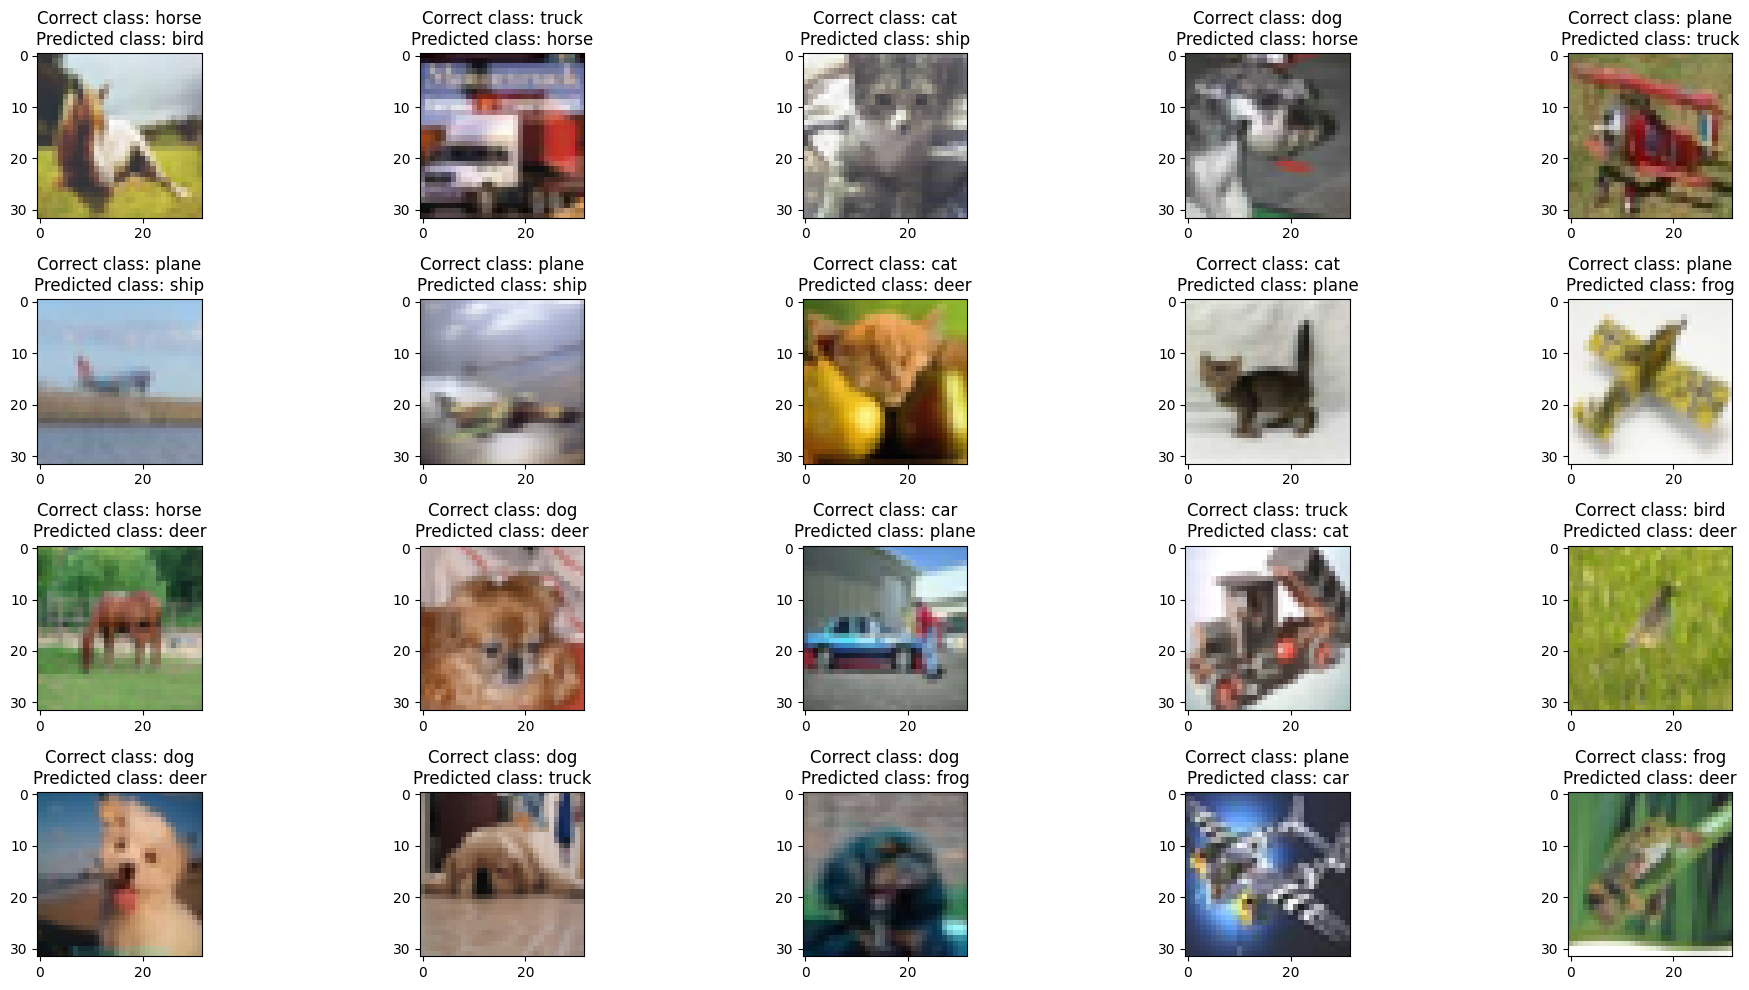

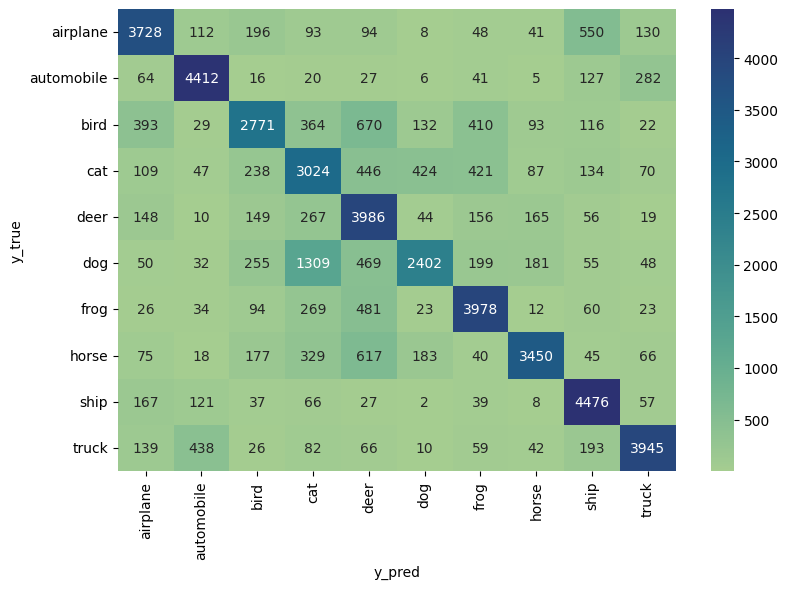

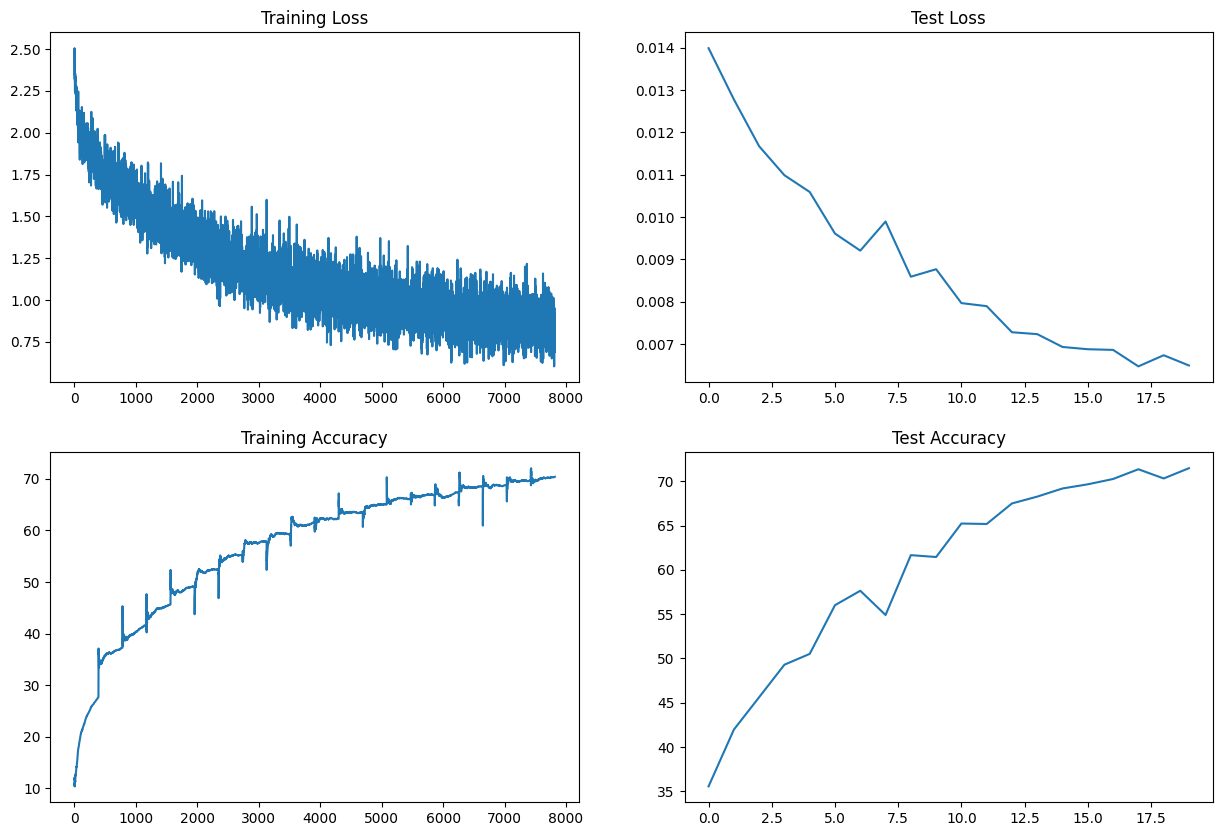

In [8]:
optimizer = optim.SGD(model.parameters(), lr=0.2, momentum=0.9)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer,mode='min',factor=0.1,patience=5)
criterion = nn.NLLLoss()


trainer = Trainer(model, train_loader, optimizer, criterion, device)
tester = Tester(model, test_loader, criterion, device)

for epoch in range(1, 21):
    trainer.train(epoch=epoch)
    _,test_loss = tester.test()
    scheduler.step(test_loss)
    print('-'*200)


misclassified_images, predictions, labels = tester.get_misclassified_images()

show_misclassified_images(
    misclassified_images[:20],
    predictions[:20],
    labels[:20],
    cifar10.classes,
);

plot_confusion_matrix(model,train_loader,'cuda',train_loader.dataset.classes);

plot_curves(trainer.train_losses,trainer.train_accuracies,tester.test_losses,tester.test_accuracies);

In [9]:
torch.save(model.state_dict(),'./data/LN/modelBN.pth')

In [10]:
torch.save(optimizer.state_dict(),'./data/LN/optimBN.pth')